In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import random

def set_seeds(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

set_seeds(42) 


In [2]:
sleep_dataset = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
sleep_dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
sleep_dataset = sleep_dataset.drop(columns=["Person ID"])

In [5]:
sleep_dataset

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
sleep_dataset.shape

(374, 12)

In [7]:
sleep_dataset.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
sleep_dataset = sleep_dataset.fillna('No Disorder')

In [9]:
sleep_dataset.isnull().sum()


Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [10]:
sleep_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [11]:
sleep_dataset.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [12]:
sleep_dataset['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

    HANDLING imbalanced data set 

In [13]:
zero = sleep_dataset[sleep_dataset["Sleep Disorder"]=='No Disorder']
one = sleep_dataset[sleep_dataset["Sleep Disorder"]=='Sleep Apnea']
two = sleep_dataset[sleep_dataset["Sleep Disorder"]=='Insomnia']

In [14]:
#stratify=df['any_featue_label'],
zero_sample = zero.sample(n=78,random_state=1)

In [15]:
new_dataset = pd.concat([zero_sample,one,two],axis=0)

In [16]:
new_dataset

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
208,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000,No Disorder
43,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
44,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,No Disorder
326,Female,53,Engineer,8.3,9,30,3,Normal,125/80,65,5000,No Disorder
203,Male,43,Engineer,6.9,6,47,7,Normal Weight,117/76,69,6800,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...
308,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
309,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
310,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
311,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia


In [17]:
print(new_dataset['Sleep Disorder'].value_counts())

Sleep Disorder
No Disorder    78
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [18]:
X = new_dataset.drop(columns=['Sleep Disorder'],axis=1)
Y = new_dataset['Sleep Disorder']

In [19]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
208,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000
43,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000
44,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000
326,Female,53,Engineer,8.3,9,30,3,Normal,125/80,65,5000
203,Male,43,Engineer,6.9,6,47,7,Normal Weight,117/76,69,6800
...,...,...,...,...,...,...,...,...,...,...,...
308,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000
309,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000
310,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000
311,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000


In [20]:
Y

208    No Disorder
43     No Disorder
44     No Disorder
326    No Disorder
203    No Disorder
          ...     
308       Insomnia
309       Insomnia
310       Insomnia
311       Insomnia
315       Insomnia
Name: Sleep Disorder, Length: 233, dtype: object

    CONVERTING ALL THE DATA TO NUMERICAL VALUES

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(new_dataset['Sleep Disorder']) 

In [22]:
y_encoded
# no disorder = 1
# Sleep Apnea = 2
# Insomnia = 0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

In [24]:
X = pd.get_dummies(X, columns=['Occupation'], drop_first=True)


In [25]:
X = pd.get_dummies(X, columns=['BMI Category'], drop_first=True)


In [26]:
# Split 'Blood Pressure' into systolic and diastolic
bp_split = X['Blood Pressure'].str.split('/', expand=True)
X['Systolic_BP'] = bp_split[0].astype(int)
X['Diastolic_BP'] = bp_split[1].astype(int)

# Drop the original column
X.drop('Blood Pressure', axis=1, inplace=True)


In [27]:
X

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Doctor,Occupation_Engineer,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic_BP,Diastolic_BP
208,0,43,7.7,8,90,5,70,8000,False,True,...,False,False,False,False,False,False,False,False,130,85
43,0,31,7.8,7,75,6,70,8000,True,False,...,False,False,False,False,False,False,False,False,120,80
44,0,31,7.7,7,75,6,70,8000,True,False,...,False,False,False,False,False,False,False,False,120,80
326,1,53,8.3,9,30,3,65,5000,False,True,...,False,False,False,False,False,False,False,False,125,80
203,0,43,6.9,6,47,7,69,6800,False,True,...,False,False,False,False,False,True,False,False,117,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85
309,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85
310,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85
311,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85


    TRAIN TEST SPLIT 

In [28]:
# checking if standardizing is needed 
X.std()

Gender                                0.495391
Age                                   8.744799
Sleep Duration                        0.811206
Quality of Sleep                      1.288862
Physical Activity Level              20.853314
Stress Level                          1.870908
Heart Rate                            4.714649
Daily Steps                        1741.815042
Occupation_Doctor                     0.335650
Occupation_Engineer                   0.325862
Occupation_Lawyer                     0.260633
Occupation_Manager                    0.065512
Occupation_Nurse                      0.455590
Occupation_Sales Representative       0.092448
Occupation_Salesperson                0.335650
Occupation_Scientist                  0.112980
Occupation_Software Engineer          0.092448
Occupation_Teacher                    0.353789
BMI Category_Normal Weight            0.182480
BMI Category_Obese                    0.203110
BMI Category_Overweight               0.493258
Systolic_BP  

In [29]:
# before standardizing the data lets split it in train and test 
X_train , X_test , Y_train , Y_test = train_test_split(X, y_encoded, test_size=0.1, stratify=y_encoded, random_state=1)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(233, 23) (209, 23) (24, 23)


In [31]:
X_train

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Doctor,Occupation_Engineer,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic_BP,Diastolic_BP
292,1,50,6.1,6,90,8,75,10000,False,False,...,False,False,False,False,False,False,False,True,140,95
312,1,52,8.4,9,30,3,65,5000,False,True,...,False,False,False,False,False,False,False,False,125,80
327,1,53,8.5,9,30,3,65,5000,False,True,...,False,False,False,False,False,False,False,False,125,80
188,1,43,6.7,7,45,4,65,6000,False,False,...,False,False,False,False,True,False,False,True,135,90
305,1,51,6.1,6,90,8,75,10000,False,False,...,False,False,False,False,False,False,False,True,140,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0,44,6.3,6,45,7,72,6000,False,False,...,False,True,False,False,False,False,False,True,130,85
66,0,32,7.2,8,50,6,68,7000,False,False,...,False,False,False,False,False,True,False,False,118,76
278,1,50,6.1,6,90,8,75,10000,False,False,...,False,False,False,False,False,False,False,True,140,95
357,1,58,8.0,9,75,3,68,7000,False,False,...,False,False,False,False,False,False,False,True,140,95


In [32]:
Y_train

array([2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2,
       2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2,
       0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1,
       2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1])

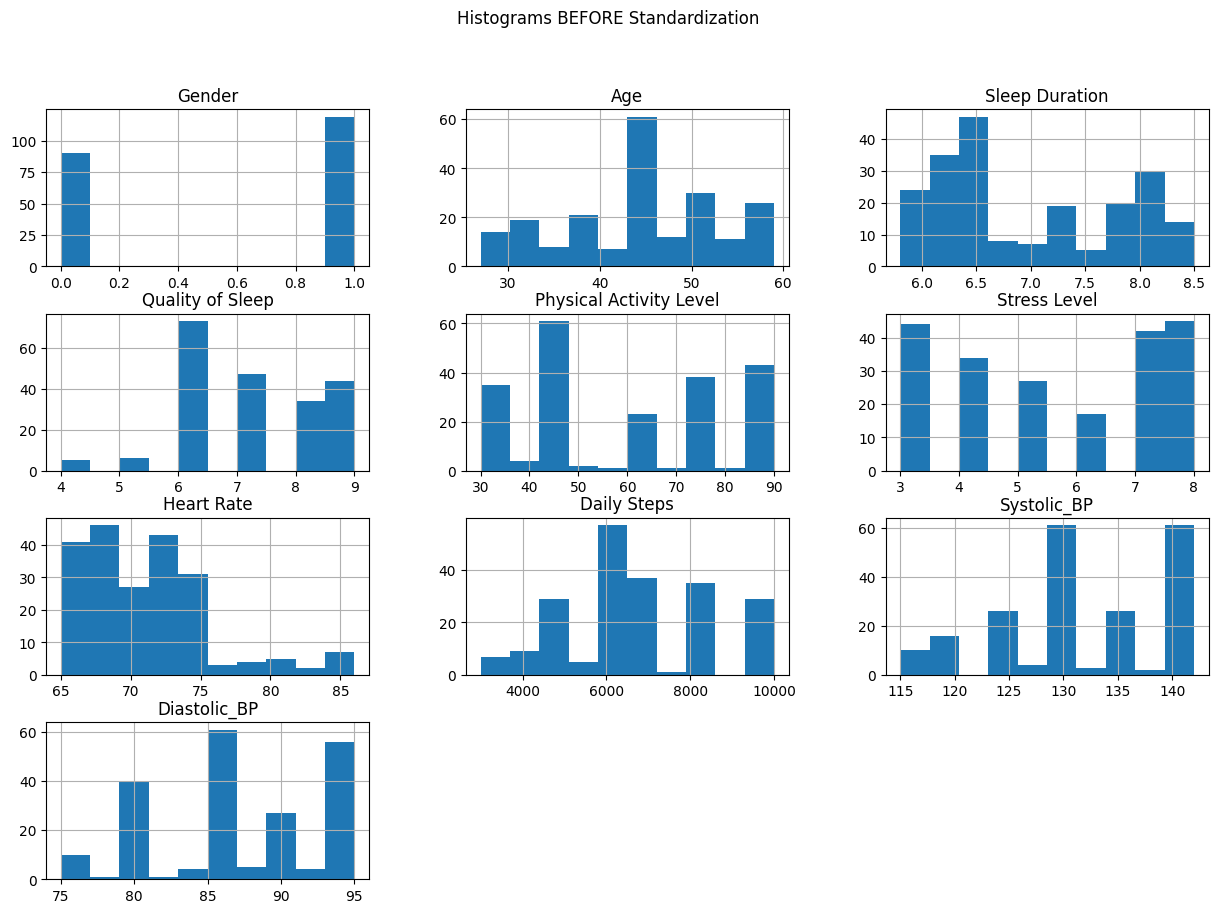

In [33]:
X_train.hist(figsize=(15, 10))
plt.suptitle("Histograms BEFORE Standardization")
plt.show()

    STANDARDUZING THE DATA 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    

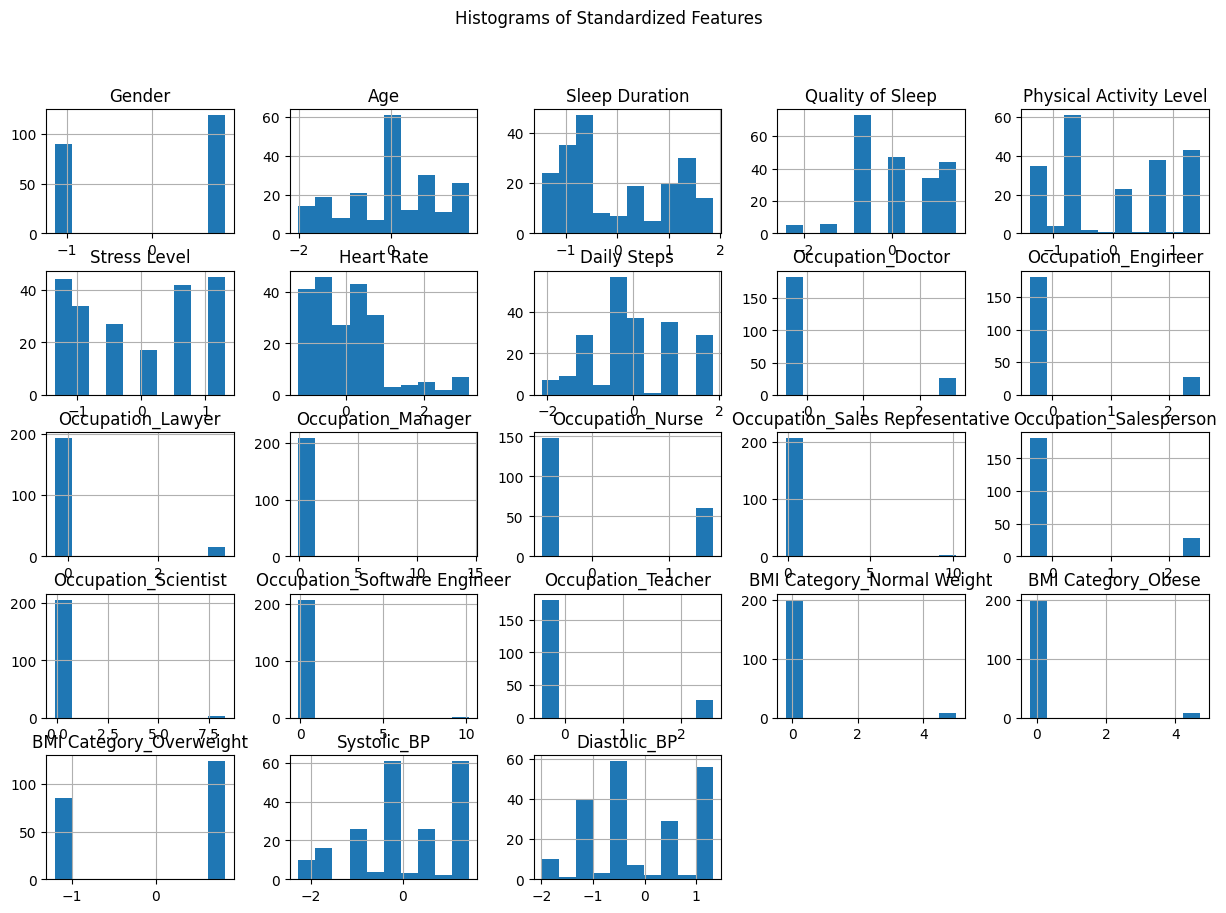

In [35]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now you can plot!
X_train_scaled_df.hist(figsize=(15, 10))
plt.suptitle("Histograms of Standardized Features")
plt.show()

In [36]:
X_train_scaled

array([[ 0.86965655,  0.66107808, -1.08711804, ...,  0.82793953,
         1.16604419,  1.31810496],
       [ 0.86965655,  0.89309373,  1.72697804, ..., -1.20781767,
        -0.89574291, -1.1607547 ],
       [ 0.86965655,  1.00910155,  1.84933004, ..., -1.20781767,
        -0.89574291, -1.1607547 ],
       ...,
       [ 0.86965655,  0.66107808, -1.08711804, ...,  0.82793953,
         1.16604419,  1.31810496],
       [ 0.86965655,  1.58914067,  1.23757002, ...,  0.82793953,
         1.16604419,  1.31810496],
       [-1.14987922, -0.26698451,  0.99286602, ..., -1.20781767,
        -0.20848055, -0.33446815]])

In [37]:
print(X_train_scaled.std())
# this is close to one so its is better now 

1.0


In [38]:
print(X_train_scaled.shape,Y_train.shape)


(209, 23) (209,)


In [39]:
print(X_test_scaled.shape,Y_test.shape)

(24, 23) (24,)


In [40]:
print(X.shape,y_encoded.shape)

(233, 23) (233,)


In [41]:
Y_test

array([0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2,
       2, 1])

    Feature importance 





feature importance can be done using random forest model 


In [42]:
from sklearn.ensemble import RandomForestClassifier
feature_importance_model = RandomForestClassifier()
feature_importance_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:

# Get importances
importances = feature_importance_model.feature_importances_

# Put in DataFrame for readability
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

                            Feature  Importance
21                      Systolic_BP    0.175676
22                     Diastolic_BP    0.136944
2                    Sleep Duration    0.088454
20          BMI Category_Overweight    0.088247
1                               Age    0.086908
4           Physical Activity Level    0.081309
12                 Occupation_Nurse    0.079490
7                       Daily Steps    0.076827
6                        Heart Rate    0.042559
3                  Quality of Sleep    0.038436
5                      Stress Level    0.034081
9               Occupation_Engineer    0.010910
14           Occupation_Salesperson    0.008964
17               Occupation_Teacher    0.008648
0                            Gender    0.008380
19               BMI Category_Obese    0.007335
10                Occupation_Lawyer    0.007090
8                 Occupation_Doctor    0.004844
16     Occupation_Software Engineer    0.004373
13  Occupation_Sales Representative    0

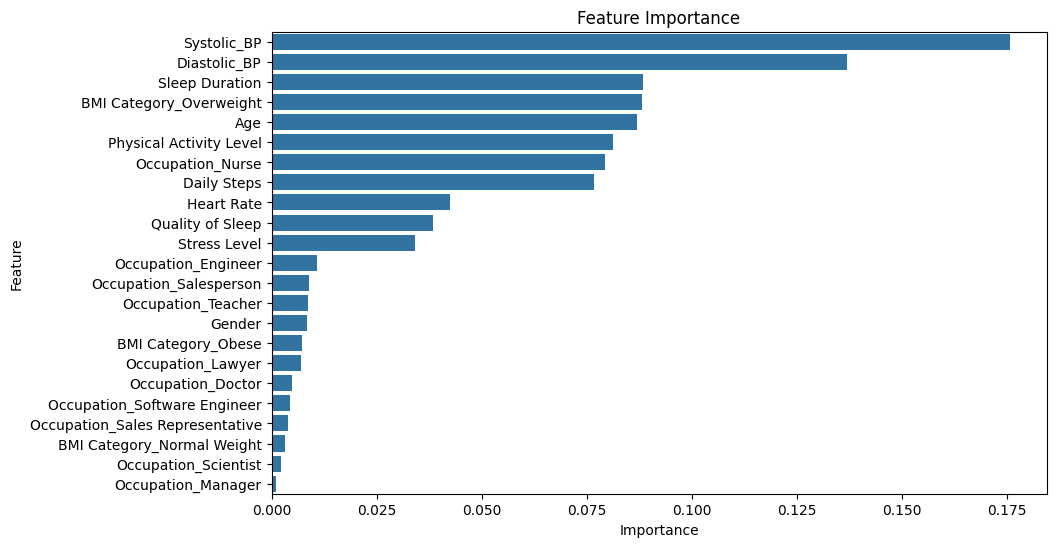

In [44]:


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.show()


    Applying different models to find accuracy 

1) Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression; 
from sklearn.metrics import accuracy_score; 

In [ ]:
model1_set1 = LogisticRegression(penalty='l2',C=0.1)

In [ ]:
model1_set1.fit(X_train_scaled, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
X_train_prediction1 = model1_set1.predict(X_train_scaled); #prediction on training data
training_data_accuracy1 = accuracy_score(X_train_prediction1, Y_train)

In [49]:
print(training_data_accuracy1)

0.8995215311004785


In [ ]:
X_test_prediction1 = model1_set1.predict(X_test_scaled); #prediction on training data
test_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)

In [51]:
print(test_data_accuracy1)

0.7916666666666666


    confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris


In [ ]:
y_prediction = model1_set1.predict(X_test_scaled)

In [54]:
cm = confusion_matrix(Y_test,y_prediction)

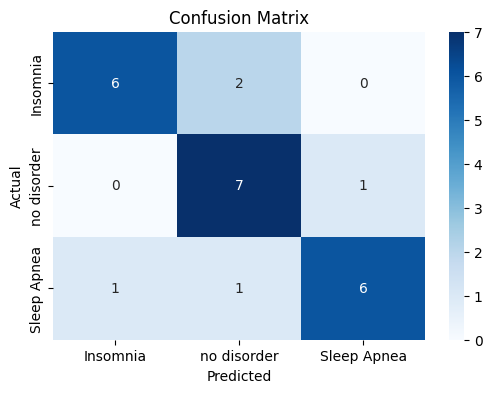

In [55]:
# no disorder = 1
# Sleep Apnea = 2
# Insomnia = 0
labels = ['Insomnia','no disorder','Sleep Apnea']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2) Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2_set2 = RandomForestClassifier()

In [ ]:
model2_set2.fit(X_train_scaled,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
X_train_prediction2 = model2_set2.predict(X_test_scaled)
training_data_accuracy2 = accuracy_score(X_train_prediction2,Y_test)

In [59]:
print(training_data_accuracy2)

0.75


3) neural netwrok

In [60]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [61]:
from tensorflow.keras import regularizers

In [ ]:

model3_set1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(23,)),
    keras.layers.Dense(23,activation='relu',kernel_regularizer=regularizers.l2(0.1)),
    keras.layers.Dense(3,activation='softmax')
])

c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model3_set1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(0.01),
            metrics=['accuracy'])

In [ ]:
# training the neural network
history = model3_set1.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=50)

Epoch 1/50


c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5938 - loss: 3.0071 - val_accuracy: 0.9048 - val_loss: 2.1821
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8475 - loss: 1.9456 - val_accuracy: 0.9048 - val_loss: 1.5245
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8979 - loss: 1.3268 - val_accuracy: 0.9048 - val_loss: 1.1030
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8994 - loss: 0.9344 - val_accuracy: 0.9048 - val_loss: 0.8539
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9219 - loss: 0.6939 - val_accuracy: 0.9048 - val_loss: 0.7269
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9219 - loss: 0.5590 - val_accuracy: 0.9048 - val_loss: 0.6539
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9204 - loss: 0.4845 - val_accuracy: 0.9048 - val_loss: 0.6091
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9277 - loss: 0.4408 - val_accuracy: 0.9048 - val_loss: 0.5897
Epoch 9/50


In [65]:
loss,accuracy = model3_set1.evaluate(X_test_scaled,Y_test)
print(accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8333 - loss: 0.9837
0.8333333134651184


In [66]:
Y_test

array([0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2,
       2, 1])

    Precision recall F1 score 

In [67]:
y_prob = model3_set1.predict(X_test_scaled)
y_pred = np.argmax(y_prob, axis=1)
y_true = Y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.70      0.88      0.78         8
           2       0.88      0.88      0.88         8

    accuracy                           0.83        24
   macro avg       0.86      0.83      0.84        24
weighted avg       0.86      0.83      0.84        24



3.2 Neural netwrok with cv 

In [69]:
from tensorflow import keras
from keras import layers
from keras.regularizers import l2

def build_model(hidden_units=32, lambda_val=0.01):
    model = keras.Sequential([
        keras.Input(shape=(X_train_scaled.shape[1],)),  
        layers.Flatten(),
        layers.Dense(hidden_units, activation='relu', kernel_regularizer=l2(lambda_val)),
        layers.Dense(3, activation='softmax')  # for 3-class classification
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

model3_2_set1 = KerasClassifier(model=build_model, verbose=0)

param_grid = {
    'model__hidden_units': [16, 32, 64],
    'model__lambda_val': [0.001, 0.01, 0.1],
    'batch_size': [16, 32],
    'epochs': [20]
}

grid = GridSearchCV(estimator=model3_2_set1, param_grid=param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_scaled, Y_train)


,estimator,KerasClassifi..._weight=None )
,param_grid,"{'batch_size': [16, 32], 'epochs': [20], 'model__hidden_units': [16, 32, ...], 'model__lambda_val': [0.001, 0.01, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function bui...001B95BD81E10>


In [71]:
best_model = grid.best_estimator_

# Final test accuracy
test_accuracy = best_model.score(X_test_scaled,Y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.7916666666666666


4) XGBoost

In [ ]:
from xgboost import XGBClassifier
model4_set1 = XGBClassifier()
model4_set1.fit(X_train_scaled,Y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_predict4 = model4_set1.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_predict4)
print(accuracy)

0.7916666666666666


In [74]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier())
], voting='soft')

ensemble.fit(X_train_scaled, Y_train)


,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [75]:
y_pred5 = ensemble.predict(X_test_scaled)

# Calculate accuracy
accuracy5 = accuracy_score(Y_test, y_pred5)

# Print the accuracy
print(f"Ensemble Model Accuracy: {accuracy5:.4f}")

Ensemble Model Accuracy: 0.7917


    Voting Classifier

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def build_model():
    model = Sequential([
        Flatten(input_shape=(23,)),
        Dense(23, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [77]:
from scikeras.wrappers import KerasClassifier

nn = KerasClassifier(model=build_model, epochs=50, batch_size=32, verbose=0)


In [78]:

lr = LogisticRegression(max_iter=1000)  # Ensure it's defined
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Fit individual models
lr.fit(X_train_scaled, Y_train)
xgb.fit(X_train_scaled, Y_train)
nn.fit(X_train_scaled, Y_train)

# Predict probabilities
lr_preds = lr.predict_proba(X_test_scaled)
xgb_preds = xgb.predict_proba(X_test_scaled)
nn_preds = nn.predict_proba(X_test_scaled)

# Average the probabilities (soft voting)
avg_preds = (lr_preds + xgb_preds + nn_preds) / 3

# Final prediction
final_preds = np.argmax(avg_preds, axis=1)

# Accuracy
print("Ensemble Accuracy:", accuracy_score(Y_test, final_preds))


c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\xgboost\training.py:183: UserWarning: [07:00:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Ensemble Accuracy: 0.7916666666666666


    HARD VOTING

In [80]:
# Imports
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

# Define NN model builder
def build_model():
    model = Sequential([
        Flatten(input_shape=(23,)),  # Input shape = number of features
        Dense(23, activation='relu'),
        Dense(3, activation='softmax')  # Output classes = 3
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize models
lr2 = LogisticRegression(max_iter=1000, random_state=42)
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
nn2 = KerasClassifier(model=build_model, epochs=50, batch_size=32, verbose=0)

# Fit models
lr2.fit(X_train_scaled, Y_train)
xgb2.fit(X_train_scaled, Y_train)
nn2.fit(X_train_scaled, Y_train)

# Get predictions
lr_preds2 = lr2.predict(X_test_scaled)
xgb_preds2 = xgb2.predict(X_test_scaled)
nn_preds2 = nn2.predict(X_test_scaled)

# Stack and do majority vote
stacked_preds2 = np.stack([lr_preds2, xgb_preds2, nn_preds2], axis=1)
final_preds2, _ = mode(stacked_preds2, axis=1)

# Evaluate
print("Hard Voting Accuracy:", accuracy_score(Y_test, final_preds2.ravel())) #ravel converts to 1d array 


c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\xgboost\training.py:183: UserWarning: [07:00:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Hard Voting Accuracy: 0.7916666666666666


    doing feature selecting 

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif


selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, Y_train)

# Step 3: Transform test data using the same selector (no fit)
X_test_selected = selector.transform(X_test_scaled)

In [82]:
X_train_selected.shape

(209, 10)

In [83]:
X_test_selected.shape

(24, 10)

In [84]:
selected_columns = selector.get_support(indices=True)
X_selected_names = X.columns[selected_columns]
print(X_selected_names)

Index(['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps',
       'Occupation_Nurse', 'Occupation_Salesperson', 'Occupation_Teacher',
       'BMI Category_Overweight', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


    APPLYING LOGISTIC REGRESSION 

In [ ]:
model1_set2 = LogisticRegression()

In [ ]:
model1_set2.fit(X_train_selected, Y_train)
X_train_prediction_new = model1_set2.predict(X_train_selected); #prediction on training data
training_data_accuracy_new = accuracy_score(X_train_prediction_new, Y_train)
print(training_data_accuracy_new)

0.8851674641148325


In [ ]:
X_test_prediction_new = model1_set2.predict(X_test_selected); #prediction on training data
test_data_accuracy_new = accuracy_score(X_test_prediction_new, Y_test)
print(test_data_accuracy_new)

0.7916666666666666


    confusion matrix
    

In [ ]:
model2_set2 = RandomForestClassifier()
model2_set2.fit(X_train_selected,Y_train)
X_train_prediction2_new = model2_set2.predict(X_test_selected)
training_data_accuracy2_new = accuracy_score(X_train_prediction2_new,Y_test)
print(training_data_accuracy2_new)

0.75


In [ ]:
model3_set2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])

model3_set2.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(0.01),
            metrics=['accuracy'])

c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# training the neural network
history_new = model3_set2.fit(X_train_selected,Y_train,validation_split=0.1,epochs=50)

Epoch 1/50


c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4137 - loss: 1.0965 - val_accuracy: 0.7619 - val_loss: 0.9251
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7341 - loss: 0.7942 - val_accuracy: 0.8095 - val_loss: 0.7799
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8543 - loss: 0.6270 - val_accuracy: 0.8095 - val_loss: 0.6995
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8660 - loss: 0.5206 - val_accuracy: 0.8095 - val_loss: 0.6644
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8640 - loss: 0.4555 - val_accuracy: 0.8095 - val_loss: 0.6617
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8757 - loss: 0.4176 - val_accuracy: 0.8095 - val_loss: 0.6745
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8902 - loss: 0.3973 - val_accuracy: 0.8095 - val_loss: 0.6900
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8918 - loss: 0.3865 - val_accuracy: 0.8571 - val_loss: 0.6996
Epoch 9/50


In [ ]:
loss_new,accuracy_new = model3_set2.evaluate(X_test_selected,Y_test)
print(accuracy_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7500 - loss: 1.0220
0.75


    Xgboost

In [ ]:
from xgboost import XGBClassifier
model4_set2 = XGBClassifier()
model4_set2.fit(X_train_selected,Y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_predict4_selected = model4_set2.predict(X_test_selected)
accuracy = accuracy_score(Y_test, y_predict4_selected)
print(accuracy)

0.7916666666666666


In [ ]:
from sklearn.ensemble import VotingClassifier

model5_set2 = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier())
], voting='soft')

model5_set2.fit(X_train_selected, Y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [ ]:
y_pred5 = model5_set2.predict(X_test_selected)

# Calculate accuracy
accuracy5 = accuracy_score(Y_test, y_pred5)

# Print the accuracy
print(f"Ensemble Model Accuracy: {accuracy5:.4f}")

Ensemble Model Accuracy: 0.7917


In [96]:
X

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Doctor,Occupation_Engineer,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic_BP,Diastolic_BP
208,0,43,7.7,8,90,5,70,8000,False,True,...,False,False,False,False,False,False,False,False,130,85
43,0,31,7.8,7,75,6,70,8000,True,False,...,False,False,False,False,False,False,False,False,120,80
44,0,31,7.7,7,75,6,70,8000,True,False,...,False,False,False,False,False,False,False,False,120,80
326,1,53,8.3,9,30,3,65,5000,False,True,...,False,False,False,False,False,False,False,False,125,80
203,0,43,6.9,6,47,7,69,6800,False,True,...,False,False,False,False,False,True,False,False,117,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85
309,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85
310,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85
311,1,52,6.6,7,45,7,72,6000,False,False,...,False,False,False,False,False,False,False,True,130,85


In [97]:
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

    trying something

In [98]:
X_train_trying, X_test_trying, Y_train_trying, Y_test_trying = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_trying = scaler.fit_transform(X_train_trying)
X_test_scaled_trying = scaler.transform(X_test_trying)    


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Create logistic regression model
model1_set3 = LogisticRegression()

# Apply GridSearchCV
grid = GridSearchCV(model1_set3, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled_trying, Y_train_trying)

# Best model after hyperparameter tuning
model1_set3_best = grid.best_estimator_


c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Usi

In [118]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the validation set
y_test_pred_trying = model1_set3_best.predict(X_test_scaled_trying)

# Evaluate using metrics
print("Test Accuracy:", accuracy_score(Y_test_trying, y_test_pred_trying))
print("Test Report:\n", classification_report(Y_test_trying, y_test_pred_trying))


Test Accuracy: 0.9148936170212766
Test Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.92      0.86      0.89        14
           2       0.89      0.94      0.91        17

    accuracy                           0.91        47
   macro avg       0.92      0.91      0.91        47
weighted avg       0.92      0.91      0.91        47



    Neural network

In [ ]:
from tensorflow import keras
from keras import layers
from keras.regularizers import l2

def build_model(hidden_units=32, lambda_val=0.01):
    model2_set3 = keras.Sequential([
        keras.Input(shape=(X_train_scaled_trying.shape[1],)),  
        layers.Flatten(),
        layers.Dense(hidden_units, activation='relu', kernel_regularizer=l2(lambda_val)),
        layers.Dense(3, activation='softmax')  # for 3-class classification
    ])

    model2_set3.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model2_set3


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

model2_set3 = KerasClassifier(model=build_model, verbose=0)

param_grid = {
    'model__hidden_units': [16, 32, 64],
    'model__lambda_val': [0.001, 0.01, 0.1],
    'batch_size': [16, 32],
    'epochs': [20]
}

grid = GridSearchCV(estimator=model2_set3, param_grid=param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_scaled_trying, Y_train_trying)


,estimator,KerasClassifi..._weight=None )
,param_grid,"{'batch_size': [16, 32], 'epochs': [20], 'model__hidden_units': [16, 32, ...], 'model__lambda_val': [0.001, 0.01, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function bui...001B971B7E9E0>


In [ ]:
model2_set3_best = grid.best_estimator_

In [ ]:
y_test_pred_trying = model2_set3_best.predict(X_test_scaled_trying)
# Evaluate using metrics
print("Testing Accuracy:", accuracy_score(Y_test_trying, y_test_pred_trying))
print("Testing Report:\n", classification_report(Y_test_trying, y_test_pred_trying))

Testing Accuracy: 0.8936170212765957
Testing Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.92      0.86      0.89        14
           2       0.84      0.94      0.89        17

    accuracy                           0.89        47
   macro avg       0.90      0.89      0.89        47
weighted avg       0.90      0.89      0.89        47



In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Types of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the SVM model
model3_set3 = SVC(decision_function_shape='ovr')  
# 'ovr' = One-vs-Rest, handles multi-class classification

# Apply GridSearchCV
grid = GridSearchCV(model3_set3, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled_trying, Y_train_trying)

# Best model after hyperparameter tuning
model3_set3_best = grid.best_estimator_

# Predict on the test set
y_test_pred_svm = model3_set3_best.predict(X_test_scaled_trying)

# Evaluate using metrics
print("Best Params:", grid.best_params_)
print("Test Accuracy:", accuracy_score(Y_test_trying, y_test_pred_svm))
print("Test Report:\n", classification_report(Y_test_trying, y_test_pred_svm))


Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.9148936170212766
Test Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.92      0.86      0.89        14
           2       0.89      0.94      0.91        17

    accuracy                           0.91        47
   macro avg       0.92      0.91      0.91        47
weighted avg       0.92      0.91      0.91        47



In [120]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting rounds
    'max_depth': [3, 5, 7],              # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.8, 1.0],             # Percentage of samples per tree
    'colsample_bytree': [0.8, 1.0]       # Percentage of features per tree
}

# Create the XGBoost model
model4_set3 = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='mlogloss',  # 'mlogloss' works for multi-class
    random_state=42
)

# Apply GridSearchCV
grid = GridSearchCV(
    estimator=model4_set3,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_scaled_trying, Y_train_trying)

# Best model after hyperparameter tuning
model4_set3_best = grid.best_estimator_

# Predict on the test set
y_test_pred_xgb = model4_set3_best.predict(X_test_scaled_trying)

# Evaluate using metrics
print("Best Params:", grid.best_params_)
print("Test Accuracy:", accuracy_score(Y_test_trying, y_test_pred_xgb))
print("Test Report:\n", classification_report(Y_test_trying, y_test_pred_xgb))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Test Accuracy: 0.9148936170212766
Test Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.93      0.93      0.93        14
           2       0.89      0.94      0.91        17

    accuracy                           0.91        47
   macro avg       0.92      0.91      0.92        47
weighted avg       0.92      0.91      0.91        47



c:\Users\HP\OneDrive\Desktop\machine learning\ML Projects\shilpa mam\tf-env\lib\site-packages\xgboost\training.py:183: UserWarning: [07:29:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score, classification_report

pred_lr = model1_set3_best.predict(X_test_scaled_trying)
pred_nn = model2_set3_best.predict(X_test_scaled_trying)  # already trained NN
pred_svm = model3_set3_best.predict(X_test_scaled_trying)
pred_xgb = model4_set3_best.predict(X_test_scaled_trying)

# Stack predictions
all_preds = np.array([pred_lr, pred_nn, pred_svm, pred_xgb])

# Majority vote (returns mode and count)
y_pred_voting = mode(all_preds, axis=0).mode

# Convert to 1D array
y_pred_voting = np.ravel(y_pred_voting)

print("Manual Voting Accuracy:", accuracy_score(Y_test_trying, y_pred_voting))
print(classification_report(Y_test_trying, y_pred_voting))


Manual Voting Accuracy: 0.9148936170212766
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.92      0.86      0.89        14
           2       0.89      0.94      0.91        17

    accuracy                           0.91        47
   macro avg       0.92      0.91      0.91        47
weighted avg       0.92      0.91      0.91        47



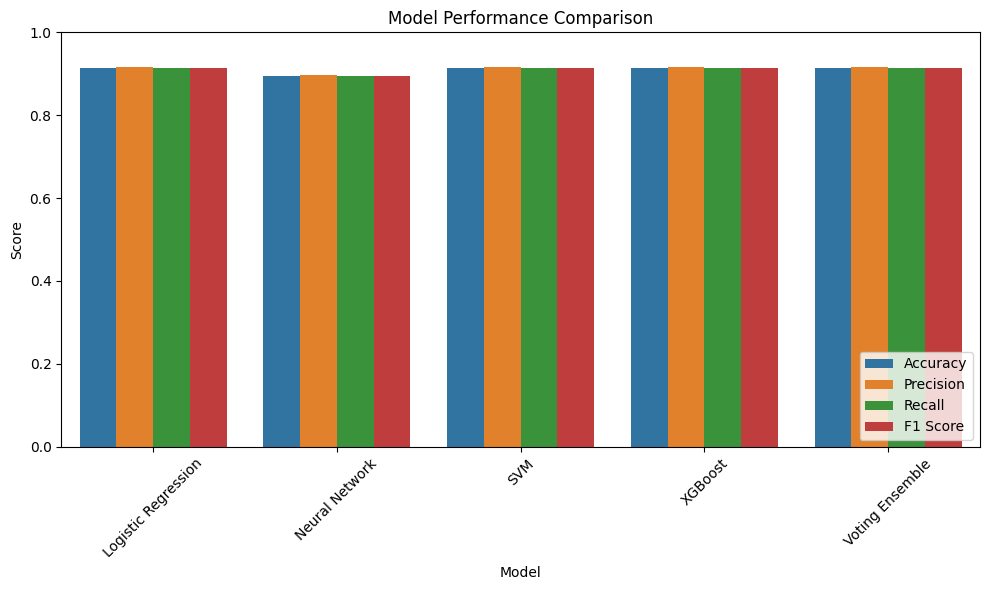

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store metrics for each model
model_scores = {}

# List of models and names
models = [
    ("Logistic Regression", model1_set3_best),
    ("Neural Network", model2_set3_best),
    ("SVM", model3_set3_best),
    ("XGBoost", model4_set3_best),
    ("Voting Ensemble", y_pred_voting)  # ensemble already predicted
]

for name, model in models:
    if name != "Voting Ensemble":  # normal models
        y_pred = model.predict(X_test_scaled_trying)
    else:  # ensemble already predicted
        y_pred = model  

    model_scores[name] = {
        "Accuracy": accuracy_score(Y_test_trying, y_pred),
        "Precision": precision_score(Y_test_trying, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(Y_test_trying, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(Y_test_trying, y_pred, average='weighted', zero_division=0)
    }

# Convert to DataFrame
df_scores = pd.DataFrame(model_scores).T.reset_index().rename(columns={"index": "Model"})

# Melt DataFrame for plotting
df_melted = df_scores.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


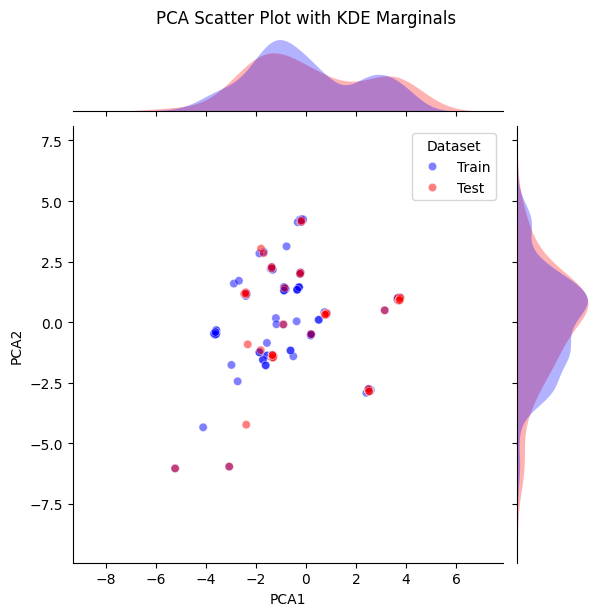

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

# Combine train and test for PCA transformation
X_combined = np.vstack((X_train_scaled_trying, X_test_scaled_trying))
pca = PCA(n_components=2)
X_combined_pca = pca.fit_transform(X_combined)

# Split back into train/test PCA points
X_train_pca = X_combined_pca[:len(X_train_scaled_trying)]
X_test_pca = X_combined_pca[len(X_train_scaled_trying):]

# Put into DataFrame for Seaborn
df_train = pd.DataFrame(X_train_pca, columns=["PCA1", "PCA2"])
df_train["Dataset"] = "Train"

df_test = pd.DataFrame(X_test_pca, columns=["PCA1", "PCA2"])
df_test["Dataset"] = "Test"

df = pd.concat([df_train, df_test])

# Create jointplot with KDE marginals
g = sns.jointplot(
    data=df,
    x="PCA1", y="PCA2",
    hue="Dataset",
    kind="scatter",
    palette={"Train": "blue", "Test": "red"},
    alpha=0.5,
    marginal_kws=dict(common_norm=False, fill=True, alpha=0.3, linewidth=0)  # KDE settings
)

g.fig.suptitle("PCA Scatter Plot with KDE Marginals", y=1.02)
plt.show()


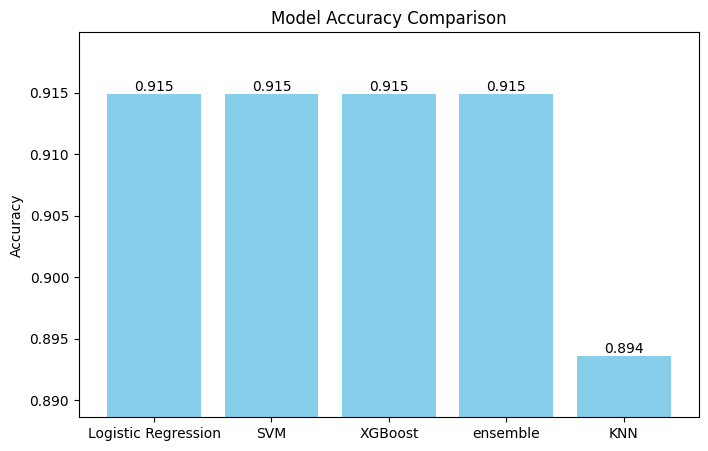

In [111]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "SVM", "KNN", "XGBoost","ensemble"]
0.9148936170212766
0.8936170212765957
0.9148936170212766
accuracies = [0.9148936170212766, 0.9148936170212766,0.8936170212765957,0.9148936170212766,0.9148936170212766]  # example values

# Sort by accuracy
sorted_models = sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True)
models_sorted, accuracies_sorted = zip(*sorted_models)

plt.figure(figsize=(8,5))
bars = plt.bar(models_sorted, accuracies_sorted, color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add labels on bars
for bar, acc in zip(bars, accuracies_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{acc:.3f}", ha='center', va='bottom')

plt.ylim(min(accuracies_sorted)-0.005, max(accuracies_sorted)+0.005)  # zoom in
plt.show()


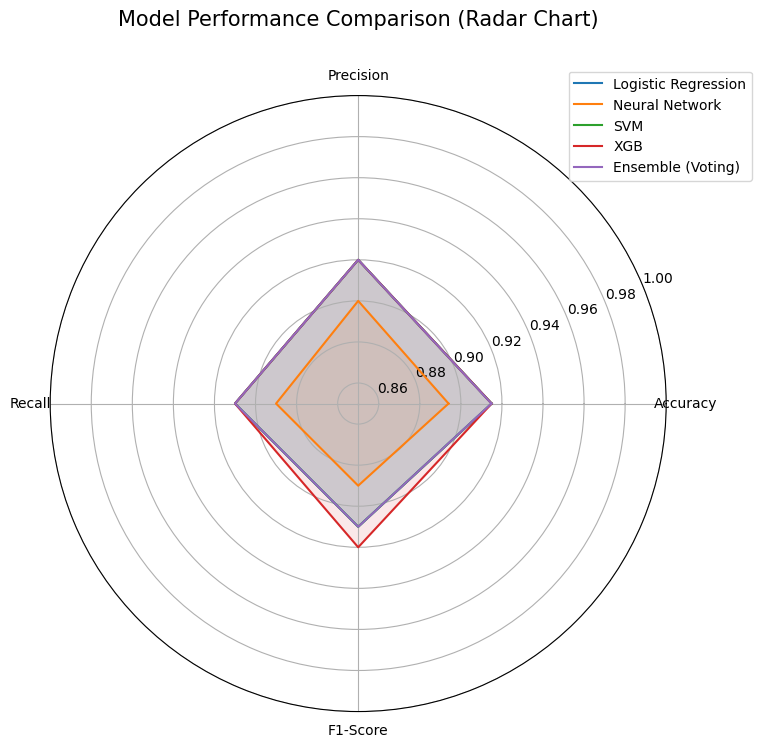

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Model scores (macro avg for precision/recall/f1, accuracy as scalar)
scores = {
    "Logistic Regression": [0.915, 0.92, 0.91, 0.91],
    "Neural Network":      [0.894, 0.90, 0.89, 0.89],
    "SVM":                 [0.915, 0.92, 0.91, 0.91],
    "XGB":                 [0.915, 0.92, 0.91, 0.92],
    "Ensemble (Voting)":   [0.9149, 0.92, 0.91, 0.91]
}

# Radar chart setup
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # close loop

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Plot each model
for model, values in scores.items():
    vals = values + values[:1]  # close loop
    ax.plot(angles, vals, label=model)
    ax.fill(angles, vals, alpha=0.1)

# Aesthetics
ax.set_thetagrids(angles[:-1] * 180/np.pi, metrics)
ax.set_ylim(0.85, 1.0)  # zoom into high accuracy range
plt.title("Model Performance Comparison (Radar Chart)", size=15, y=1.1)
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()


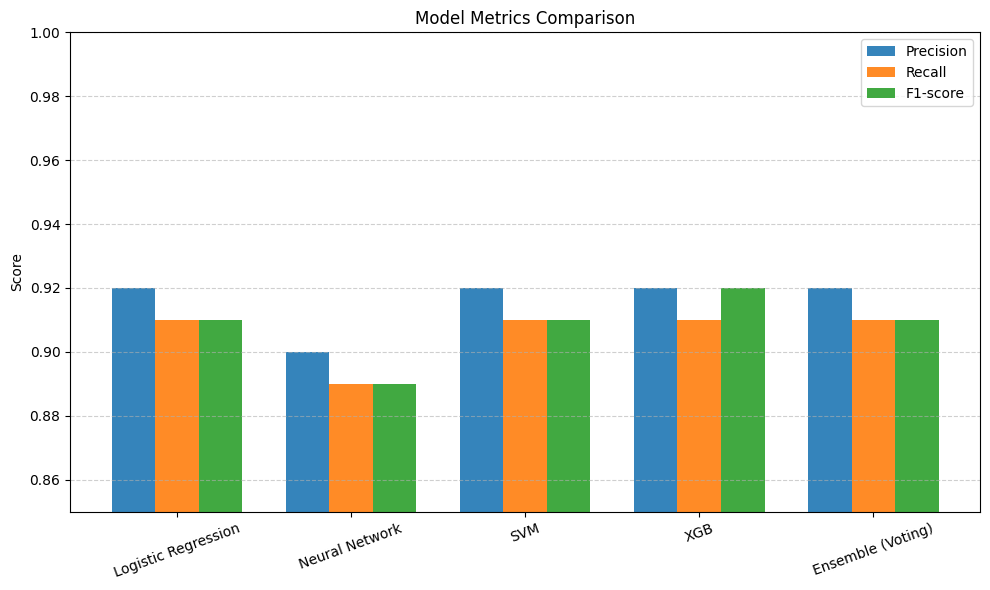

In [113]:

# Models and their scores
models = ["Logistic Regression", "Neural Network", "SVM", "XGB", "Ensemble (Voting)"]
precision = [0.92, 0.90, 0.92, 0.92, 0.92]
recall    = [0.91, 0.89, 0.91, 0.91, 0.91]
f1        = [0.91, 0.89, 0.91, 0.92, 0.91]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label="Precision", alpha=0.9)
plt.bar(x, recall, width, label="Recall", alpha=0.9)
plt.bar(x + width, f1, width, label="F1-score", alpha=0.9)

plt.ylabel("Score")
plt.ylim(0.85, 1.0)  # zoom in to highlight small differences
plt.title("Model Metrics Comparison")
plt.xticks(x, models, rotation=20)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


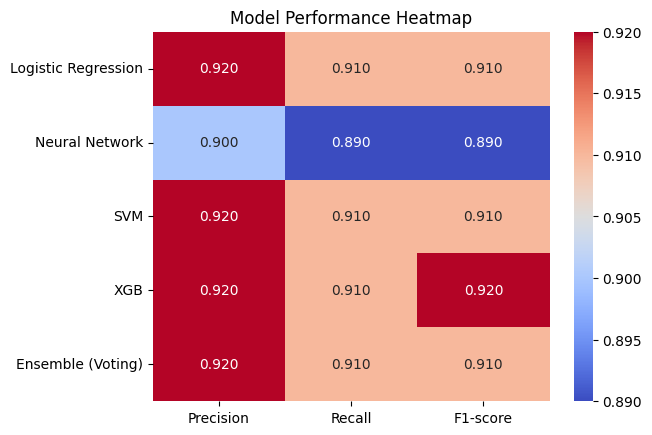

In [114]:
import seaborn as sns
import pandas as pd

data = {
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
}
df = pd.DataFrame(data, index=models)

sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Model Performance Heatmap")
plt.show()
